In [6]:
import numpy as np

from preprocessing import load_normalized_image, add_gaussian_noise
from results_tools import plot_simple_image
from im_tools import fast_noise_std_estimation
from coefficients_data_handler import get_surface_function
from p_laplacian_denoising_algorithms import p_laplacian_denoising

In [13]:
# Image parameters
img_index = 26
# Noise profile
std = .05
# Parameters for denoising
p = 1
dt = 1e-3
n_it = 50000
eps = 1e-6
fidelity = 1.0

In [14]:
# Load image
img = load_normalized_image(f'noise_test_images/img_{img_index}')
H, W, C = img.shape

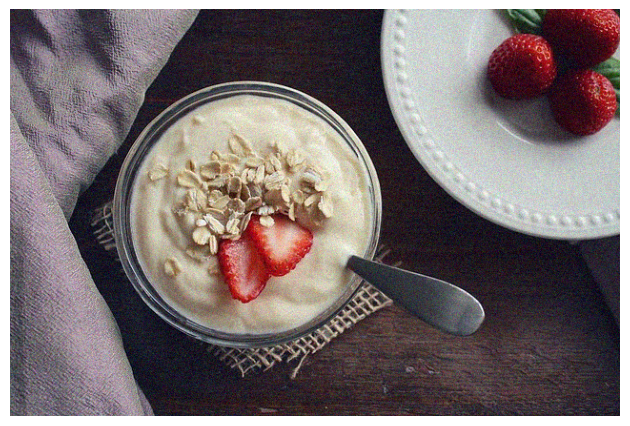

In [15]:
# Add Gaussian additive noise
img_noise = add_gaussian_noise(img, avg=0, std=std)
plot_simple_image(img_noise)

In [16]:
surface_coefs = []
std_est = fast_noise_std_estimation(img_noise)
# Load synthetic database data
for db_index in range(1, 18):
    my_surf = get_surface_function(db_index, std_est, p, '')
    surface_coefs.append(my_surf(W / 640, H / 640))

In [17]:
# Apply denoising algorithm
res = p_laplacian_denoising(img_noise, fidelity, eps, p, dt, n_it, surface_coefs, img, False)

it0
it1
it2
it3
it4
it5
it6
it7
it8
it9
it10
it11
it12
it13
it14
it15
it16
it17
it18
it19
it20
it21
it22
it23
it24
it25
it26
it27
it28
it29
it30
it31
it32
it33
it34
it35
it36
it37
it38
it39
it40
it41
it42
it43
it44
it45
it46
it47
it48
it49
it50
it51
it52
it53
it54


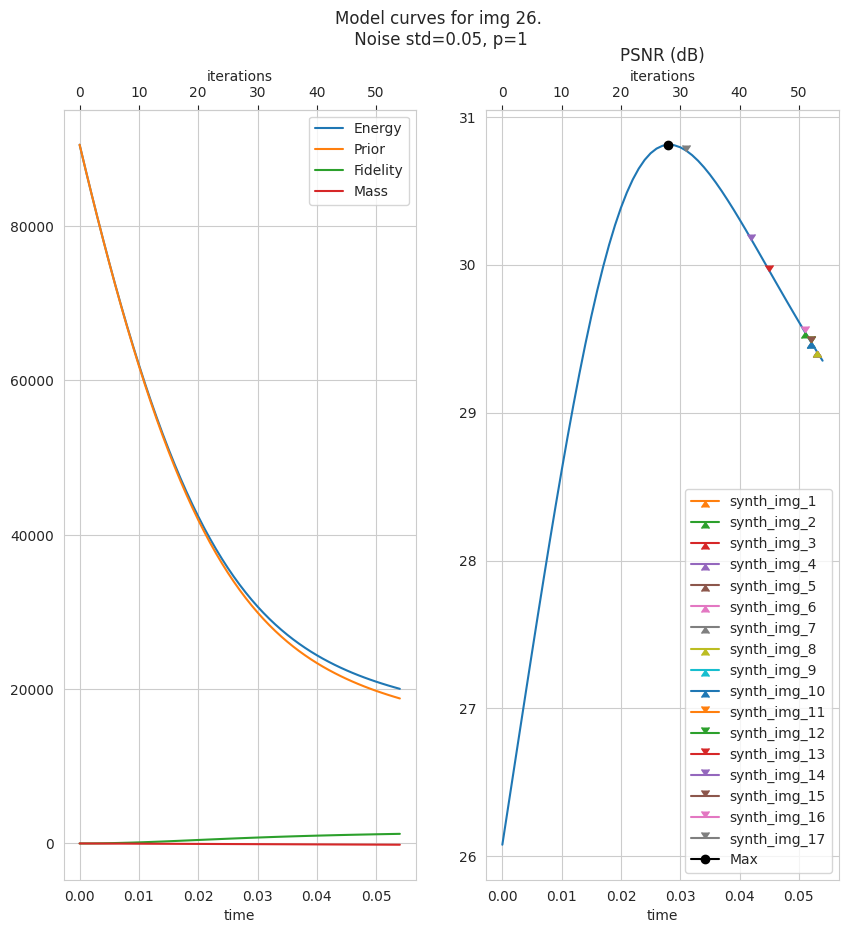

In [19]:
from results_tools import plot_model_curves
indices = list(range(1,18))
stop_dict = {}
j = 0
for coef in indices:
    stop_dict[f'synth_img_{coef}'] = int(res['coefficients'][j])
    j += 1
mass = res['mass']
plot_model_curves(energy=res['energy'], prior=res['prior'], fidelity=res['fidelity'],
                                time_step=dt,
                                stop_dict=stop_dict, psnr_values=res['psnr'], mass=res['mass'],
                                title=f'Model curves for img {img_index}.\n Noise std={std}, p={p}')#,
                                # save_pdf=True, show_plot=False,
                                # pdf_name=f'natural_images_analysis/img_{img_index}/analysis_{img_index}_{noise}_p{p}')


### ¿Se cumplirá siempre?

Resultados del lanzamiento sobre el banco de imágenes:

![img](natural_images_analysis/rel_error.png)

In [ ]:
# Process data
import numpy as np
from skimage.metrics import structural_similarity as ssim

j = 1
for psnr_image in res['psnr_images']:
    index, ssim_img = ssim(psnr_image, img, data_range=1.0, full=True, channel_axis=2)
    print(f'Synth image {j}: {index}')
    if j == 13 or j == 16:
        ssim_img = (ssim_img - np.min(ssim_img)) / (np.max(ssim_img) - np.min(ssim_img))
        plot_simple_image(ssim_img)
    j+=1

In [ ]:
index, ssim_img = ssim(img, img, data_range=1.0, full=True, channel_axis=2)
plot_simple_image(ssim_img)

Synth image 1: 0.8029453790281981
Synth image 2: 0.8098434332885179
Synth image 3: 0.7950774291054592
Synth image 4: 0.8034812265555601
Synth image 5: 0.7930501339498107
Synth image 6: 0.7963852508791588
Synth image 7: 0.792059600019351
Synth image 8: 0.7960920929598473
Synth image 9: 0.7928352122464704
Synth image 10: 0.7963852508791588
Synth image 11: 0.7981734592972728
Synth image 12: 0.7979421583894926
Synth image 13: 0.7613070609362529


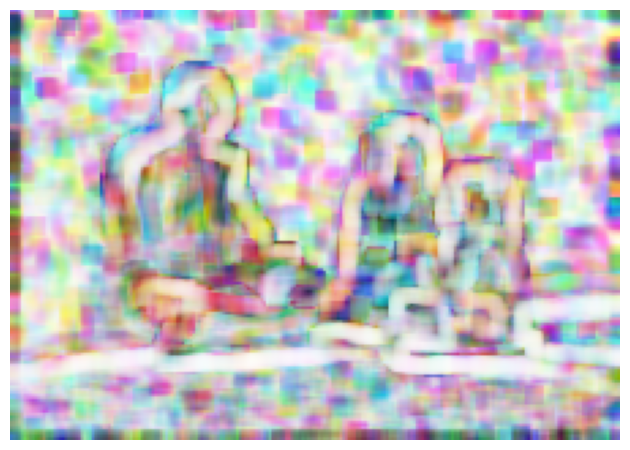

Synth image 14: 0.7668522049820424
Synth image 15: 0.7979421583894926
Synth image 16: 0.811971322232686


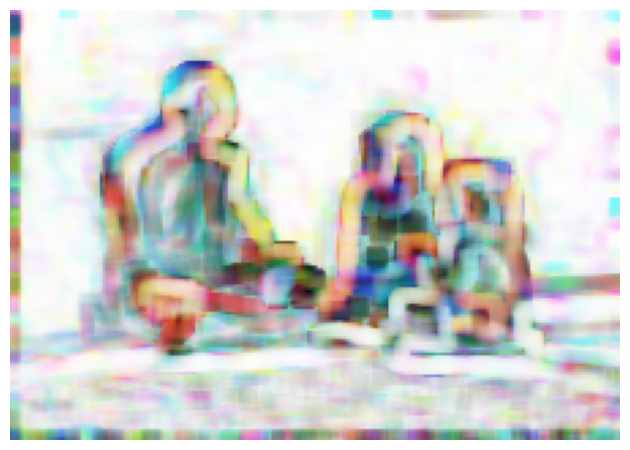

In [40]:
# Process data
import numpy as np
from skimage.metrics import structural_similarity as ssim

j = 1
for psnr_image in res['psnr_images']:
    index, ssim_img = ssim(psnr_image, img, data_range=1.0, full=True, channel_axis=2)
    print(f'Synth image {j}: {index}')
    if j == 13 or j == 16:
        ssim_img = (ssim_img - np.min(ssim_img)) / (np.max(ssim_img) - np.min(ssim_img))
        plot_simple_image(ssim_img)
    j+=1

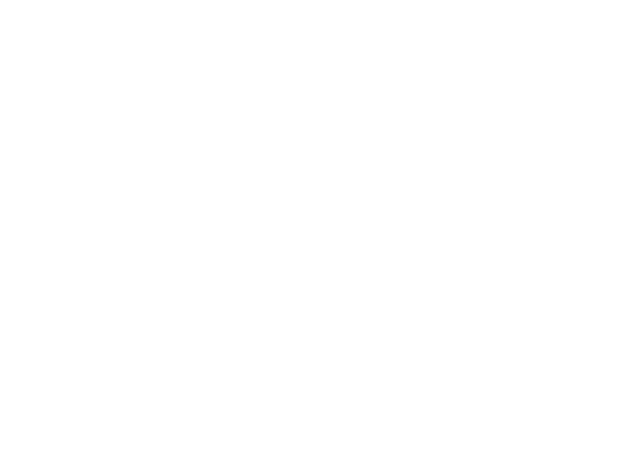

In [39]:
index, ssim_img = ssim(img, img, data_range=1.0, full=True, channel_axis=2)
plot_simple_image(ssim_img)